In [1]:
import os

# Set current working directory to "INDE-597-Group-A" (the outermost folder in the repository) for proper package imports
os.chdir("C:/Users/georg/OneDrive/Documents/Rice University/Current Coursework/Inde597 Deep and Reinforcement Learning/Code/INDE-597-Group-A")

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym

from Ch6.temporal_difference import Sarsa, QLearning
from environments.training import EnvironmentSolitaire

In [2]:
class CliffWalking(EnvironmentSolitaire):
    '''
    Wraps an OpenAI Gymnasium Cliffwalking environment
    '''
    env = None  # the associated OpenAI Cliffwalking environment

    def __init__(self, agent):
        '''
        Initializes this environment
        '''
        super().__init__(agent)
        self.env = gym.make("CliffWalking-v0", render_mode="rgb_array")
        
    def get_actions(self):
        '''
        RETURNS set of up down left right movements
        '''
        return tuple(range(self.env.action_space.n))
    
    def step(self, action):
        '''
        Steps in the current game
        Mutates self.current_state to be the next state
        INPUT
            action; action taken at this step
        RETURNS 3 arguments
            0: next state after the step
            1: reward for the action
            2: boolean flag whether the environment has terminated
        '''
        self.current_state, reward, done, _, _ = self.env.step(action)
        return self.current_state, reward, done
    
    def reset(self):
        '''
        Resets environment
        '''
        self.current_state, _ = self.env.reset()
        return self.current_state

In [3]:
# class CliffWalking(EnvironmentSolitaire):
    
#     # Shape of board
#     board_shape = (12, 4)
        
#     # Start and end locations
#     start = (0, 0)
#     goal = (11, 0)
    
#     def get_actions(self):
#         '''
#         RETURNS set of up down left right movements
#         '''
#         return ("U", "D", "L", "R")
    
#     def step(self, action):
#         '''
#         Steps in the current game
#         Mutates self.current_state to be the next state
#         INPUT
#             action; action taken at this step
#         RETURNS 3 arguments
#             0: next state after the step
#             1: reward for the action
#             2: boolean flag whether the environment has terminated
#         '''
#         # Move the player
#         new_state = list(self.current_state)
#         match action:
#             case "U":
#                 new_state[1] += 1
#             case "D":
#                 new_state[1] += -1
#             case "L":
#                 new_state[0] += -1
#             case "R":
#                 new_state[0] += 1
                
#         # Check falling off cliff
#         if new_state[1] == 0 and new_state[0] != 0 and new_state[0] != 11:
#             new_state = self.start
#             reward = -100
            
#         # Set player within bounds, if they exceeded the bounds
#         else:
#             new_state[0] = max(new_state[0], 0)
#             new_state[0] = min(new_state[0], self.board_shape[0] - 1)
#             new_state[1] = max(new_state[1], 0)
#             new_state[1] = min(new_state[1], self.board_shape[1] - 1)
#             reward = -1
        
#         # Return
#         new_state = tuple(new_state)
#         done = (new_state == self.goal)
#         self.current_state = new_state
#         return self.current_state, reward, done
    
#     def reset(self):
#         # Resets to start
#         self.current_state = self.start
#         return self.start        

C:\Users\georg\OneDrive\Documents\Rice University\Current Coursework\Inde597 Deep and Reinforcement Learning\Code\.venv_inde597\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\georg\OneDrive\Documents\Rice University\Current Coursework\Inde597 Deep and Reinforcement Learning\Code\.venv_inde597\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


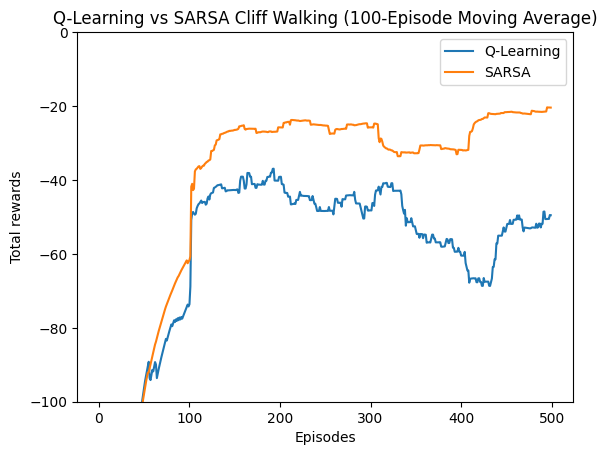

In [4]:
N_EPISODES = 500
EPS = 0.1
ALPHA = 0.5
GAMMA = 1

models = [QLearning(eps=EPS, alpha=ALPHA, gamma=GAMMA), Sarsa(eps=EPS, alpha=ALPHA, gamma=GAMMA)]
rewards =[]
rolling_rewards = []

for mdl in models:
    game = CliffWalking(mdl)
    rewards.append([])
    rolling_rewards.append([])
    for ind in range(N_EPISODES):
        history, reward = game.play_game()
        rewards[-1].append(reward[0])
        rolling_rewards[-1].append(np.mean(rewards[-1][max(0, ind-100) : ind]))
    plt.plot(range(N_EPISODES), rolling_rewards[-1])
    
# print(rewards)   
# print(rolling_rewards)
plt.xlabel("Episodes")
plt.ylabel("Total rewards")
plt.ylim([-100, 0])
plt.legend(["Q-Learning", "SARSA"])
plt.title("Q-Learning vs SARSA Cliff Walking (100-Episode Moving Average)")
plt.show()